### Credentials

In [1]:
IG_LINK = 'https://www.instagram.com/'

USERNAME = input('Enter your Ig Handle: ')
PASSWORD = input('Enter your Ig Password: ')

Enter your Ig Handle: 9anubhavtyagi
Enter your Ig Password: GAX@instagram-9


### Module Imports

In [2]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from selenium.webdriver.support.select import Select
from selenium.common import exceptions as SCE

import time

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Start session

In [4]:
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

driver.maximize_window()



====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST chromedriver version for 97.0.4692 google-chrome
Driver [C:\Users\anubh\.wdm\drivers\chromedriver\win32\97.0.4692.71\chromedriver.exe] found in cache


**wait object** 

In [5]:
wait = WebDriverWait(driver, 10)

### function to login

In [6]:
def log_in(driver, wait, username, password):
    # visit instagram
    driver.get(IG_LINK)
    time.sleep(3)
    
    # wait until log-in form is loaded -> by checking username box
    wait.until(EC.presence_of_element_located((By.NAME, 'username')))
    
    username_box = driver.find_element(By.NAME, 'username')
    username_box.send_keys(username)
    
    password_box = driver.find_element(By.NAME, 'password')
    password_box.send_keys(password)
    
    password_box.submit()
    time.sleep(3)
    
    
    # avoid save login info
    try:
        # wait until or if save login info option appears
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'y3zKF')))
        ele = driver.find_element(By.CLASS_NAME, 'y3zKF')
        ele.click()
        
    except:
        print('No login info save option appears')
    
    
    time.sleep(2)
    

    # avoid turning on notifications
    try:
        # wait until or if turn-on notifications option appears
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'HoLwm')))
        ele = driver.find_element(By.CLASS_NAME, 'HoLwm')
        ele.click()
        
    except:
        print('No turn-on notifications option appears')


**log in to instagram** 

In [7]:
log_in(driver, wait, USERNAME, PASSWORD)

### loading data from csv that I created in previous notebook

In [8]:
df = pd.read_csv('top5.csv')
# df

In [9]:
handle_names = df['handle_name'].values
followers_counts = df['followers_count'].values
handle_links = df['handle_link'].values

# 3.) You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:

## 3.) a. Find out the likes of the top 10 posts of the 5 handles obtained earlier.

### function to get likes of a post

In [10]:
def get_likes(driver, wait):    
    try:
        # extract likes
        wait.until(EC.presence_of_element_located((By.XPATH, '/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[2]/section[2]/div/div/a/span')))
        likes_count = driver.find_element(By.XPATH, '/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[2]/section[2]/div/div/a/span').text

        # makes likes_count numeric
        likes_count = likes_count.replace(',', '')
        likes_count = int(likes_count)
        
    except:
        likes_count = -1
        
    return likes_count

### function to get 'n' posts likes

In [11]:
def get_n_posts_likes(driver, wait, link, num):
    # open link
    driver.get(link)
    
    # list to store post's likes
    posts_likes = []
    posts_covered = 0
    i = 0
    
    while True:
        # if 'num posts are collected'
        if posts_covered == num:
            return posts_likes
        
        # load all posts tag
        wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div/div/div/a')))
        posts_ele = driver.find_elements(By.XPATH, '//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div/div/div/a')
        
        # until ith posts is absent
        while len(posts_ele) <= i:
            # scroll and load posts_ele list again
            driver.execute_script(f'window.scrollTo(0, document.body.scrollHeight);')
            posts_ele = driver.find_elements(By.XPATH, '//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div/div/div/a')
           
        # click on ith post
        posts_ele[i].click()
        time.sleep(2)
        
        # fetch likes count 
        likes_count = get_likes(driver, wait)
        if likes_count != -1:
            posts_likes.append(likes_count)
            posts_covered += 1
        
        driver.back()
        i += 1
        
    return posts_likes

## Print likes, and store total of likes for further analysis

In [12]:
# list to store total_likes
total_likes_arr = []
for i in range(5):
    # fetch post_likes
    posts_likes = get_n_posts_likes(driver, wait, handle_links[i], 10)
    
    # print post_likes
    print(handle_names[i], end =' --> ')
    print(posts_likes)
    
    # add sum of posts_likes in total_likes_arr
    total_likes_arr.append(sum(posts_likes))

foodie_incarnate --> [53905, 42233, 51807, 12856, 139995, 21387, 11426, 24341, 881170, 30105]
dilsefoodie --> [32052, 17168, 23823, 13541, 19057, 3269, 19212, 3185, 8439, 39060]
foodtalkindia --> [167, 338, 355, 3873, 563, 1394, 293, 680, 271, 418]
delhifoodwalks --> [779, 454, 442, 436, 1195, 276, 297, 685, 2323, 346]
food --> [366, 359, 462, 456, 753, 933, 457, 727, 1058, 877]


## 3.) b. Calculate the average likes for a handle.

In [13]:
average_likes_arr = np.array(total_likes_arr)/10

for i in range(5):
    print(f'{handle_names[i]} --> {average_likes_arr[i]}')

foodie_incarnate --> 126922.5
dilsefoodie --> 17880.6
foodtalkindia --> 835.2
delhifoodwalks --> 723.3
food --> 644.8


## 3.) c. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [14]:
fl_ratio = followers_counts/average_likes_arr

for i in range(5):
    print(f'{handle_names[i]} --> {fl_ratio[i]}')

foodie_incarnate --> 8.666706060785124
dilsefoodie --> 53.80132657740792
foodtalkindia --> 367.5766283524904
delhifoodwalks --> 219.82579842389052
food --> 245.0372208436725


## 3.) d. Create a bar graph to depict the above obtained information.

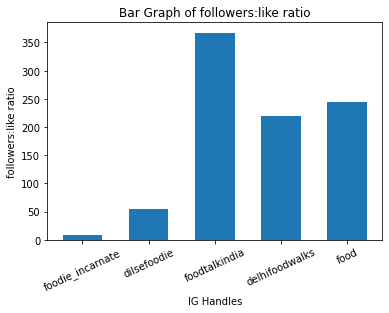

In [15]:
plt.bar(handle_names, fl_ratio, width=0.6)

# Naming graph
plt.title('Bar Graph of followers:like ratio')
plt.xlabel('IG Handles')
plt.ylabel('followers:like ratio')

# rotate x-axis labels
plt.xticks(rotation=25)

plt.show()

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||